In [1]:
import numpy as np
import pandas as pd

In [2]:
# Substituir o separador decimal ',' por '.' 
f = lambda x : (x.replace(',', '.'))
# Carregando os microdados do enade 2017
enade = pd.read_csv(
    'dados/microdados_ENADE_2017.csv.zip', # caminho do arquivo
    compression='zip',                     # tipo de compressão do arquivo
    sep=';',                               # separador de colunas  
    na_values=['.', '*'],                  # substituir as strings '.' e '*' por NA (ver dicionário de dados)
    converters={'NT_GER':f,                # substituir o separador decimal por '.'
                'NT_FG':f, 
                'NT_OBJ_FG':f, 
                'NT_DIS_FG':f, 
                'NT_CE':f, 
                'NT_OBJ_CE':f, 
                'NT_DIS_CE':f
               },
    encoding= 'UTF-8',                     # definir a codificação
    dtype={'DS_VT_ESC_OFG': 'str',         # converter colunas com valores mistos (str, num) para str
           'DS_VT_ESC_OCE': 'str',         
           'DS_VT_ACE_OCE': 'str'           
          }
)
# Convertendo as coluna das notas de object para numeric
cols_convert = ['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE']
enade[cols_convert] = enade[cols_convert].apply(pd.to_numeric, errors='coerce', axis=1)

In [3]:
# Exibindo o dataframe
enade.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
enade.shape

(537436, 150)

In [5]:
conceitos_enade = pd.read_csv('dados/resultados_conceito_enade_2017.csv')
 
conceitos_enade.head()

,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,Modalidade de Ensino,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,2017,21,ARQUITETURA E URBANISMO,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Universidade,Pública Federal,44,Educação Presencial,...,MT,44,43,"59,4977","3,1401","62,9744","4,4030","4,0873",5,NaN
1,2017,21,ARQUITETURA E URBANISMO,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,132,Educação Presencial,...,DF,141,128,"61,3602","3,4161","60,7516","4,1266","3,9490",5,NaN
2,2017,21,ARQUITETURA E URBANISMO,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,1138293,Educação Presencial,...,DF,123,110,"58,3155","2,9649","55,6845","3,4965","3,3636",4,NaN
3,2017,21,ARQUITETURA E URBANISMO,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pública Federal,99444,Educação Presencial,...,SE,42,31,"62,2290","3,5448","57,5161","3,7243","3,6794",4,NaN
4,2017,21,ARQUITETURA E URBANISMO,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pública Federal,122640,Educação Presencial,...,AM,64,50,"60,3600","3,2679","54,7100","3,3753","3,3485",4,NaN


In [6]:
# Separando apenas as respostas dos alunos das IES do nordeste
uf_nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
enade_nordeste = pd.DataFrame()
 
for uf in uf_nordeste:
    temp = conceitos_enade[conceitos_enade['Sigla da UF'] == uf]
    enade_nordeste = pd.concat([enade_nordeste, temp])
   
enade_nordeste =  enade_nordeste.reset_index()
 
enade_nordeste.head()

,index,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,150,2017,21,ARQUITETURA E URBANISMO,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,Universidade,Pública Estadual,11891,...,MA,107,106,"59,4226","3,1290","56,1264","3,5515","3,4458",4,NaN
1,194,2017,21,ARQUITETURA E URBANISMO,823,UNIVERSIDADE DO CEUMA - UNICEUMA,UNICEUMA,Universidade,Privada sem fins lucrativos,55336,...,MA,121,99,"47,9061","1,4225","38,2333","1,3264","1,3505",2,NaN
2,257,2017,21,ARQUITETURA E URBANISMO,1885,UNIDADE DE ENSINO SUPERIOR DOM BOSCO,UNDB,Faculdade,Privada com fins lucrativos,1154789,...,MA,36,36,"62,9139","3,6463","49,4222","2,7178","2,9499",4,NaN
3,574,2017,72,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,2189,FACULDADE DO MARANHÃO,FACAM-MA,Faculdade,Privada com fins lucrativos,1258369,...,MA,15,11,"50,0273","3,1397","30,3909","1,4096","1,8421",2,NaN
4,645,2017,72,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,4964,FACULDADE DE CIÊNCIAS E TECNOLOGIA DO MARANHÃO,FACEMA,Faculdade,Privada com fins lucrativos,1106470,...,MA,35,27,"47,6259","2,8345","34,8148","1,9460","2,1681",3,NaN


In [7]:
enade_nordeste.shape

(1997, 23)

In [8]:
enade_nordeste_publicas = enade_nordeste[enade_nordeste['Categoria Administrativa'].str.contains(
    'Pública', case=False, regex=True)]
 
enade_nordeste_publicas.head()

,index,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,150,2017,21,ARQUITETURA E URBANISMO,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,Universidade,Pública Estadual,11891,...,MA,107,106,"59,4226","3,1290","56,1264","3,5515","3,4458",4,NaN
7,963,2017,701,MATEMÁTICA (BACHARELADO),548,UNIVERSIDADE FEDERAL DO MARANHÃO,UFMA,Universidade,Pública Federal,311439,...,MA,2,2,"43,5500","1,5049","44,1500","1,8033","1,7287",2,NaN
8,1140,2017,702,MATEMÁTICA (LICENCIATURA),548,UNIVERSIDADE FEDERAL DO MARANHÃO,UFMA,Universidade,Pública Federal,11439,...,MA,12,12,"50,8500","2,6409","35,1750","1,8997","2,0850",3,NaN
9,1144,2017,702,MATEMÁTICA (LICENCIATURA),568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,Universidade,Pública Estadual,81423,...,MA,33,27,"38,6259","1,2145","27,9481","1,0780","1,1121",2,NaN
10,1145,2017,702,MATEMÁTICA (LICENCIATURA),568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,Universidade,Pública Estadual,81812,...,MA,27,26,"52,1885","2,7971","27,3731","1,0126","1,4588",2,NaN


In [9]:
enade_nordeste_publicas.shape

(1285, 23)

In [10]:
maior_conceito = enade_nordeste_publicas[enade_nordeste_publicas['Conceito Enade (Faixa)'] == '5']

In [11]:
maior_conceito.shape

(70, 23)

In [12]:
menor_conceito = enade_nordeste_publicas[enade_nordeste_publicas['Conceito Enade (Faixa)'] == '1']

In [13]:
menor_conceito.shape

(71, 23)

In [62]:
maior_conceito.rename(columns={'Código do Curso':'CO_CURSO'}, inplace=True)
 
enade_maior = pd.merge(enade, maior_conceito, on='CO_CURSO')                  
 
enade_maior.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN
1,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN
2,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN
3,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN
4,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN


In [15]:
enade_maior.shape

(3156, 172)

In [16]:
menor_conceito.rename(columns={'Código do Curso':'CO_CURSO'}, inplace=True)
 
enade_menor = pd.merge(enade, menor_conceito, on='CO_CURSO')                  
 
enade_menor.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN
1,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN
2,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN
3,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN
4,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN


In [17]:
enade_menor.shape

(2767, 172)

In [18]:
# Bibliotecas necessárias para plotar as vizualizações
import matplotlib.pyplot as plt
# Plotar os gráficos direto no jupyter notebook
%matplotlib inline
# Definir o estilo dos gráficos semelhantes ao ggplot
plt.style.use('seaborn-whitegrid')

In [19]:
nrespostas_validas_maior = 2868
nrespostas_validas_menor = 2200

In [20]:
enade_menor['QE_I01'].value_counts().sort_index(ascending=True)

A    1239
B     781
C      81
D      17
E      82
Name: QE_I01, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

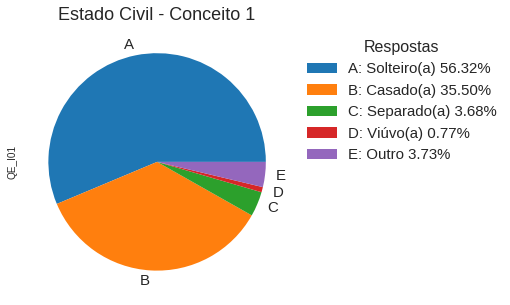

In [21]:
enade_menor['QE_I01'].value_counts().sort_index(ascending=True).plot(
    kind='pie',
    figsize=(5, 5),
    fontsize=15
    )

a = 'A: Solteiro(a) ' + '{:.2%}'.format(1239/nrespostas_validas_menor)
b = 'B: Casado(a) ' + '{:.2%}'.format(781/nrespostas_validas_menor)
c = 'C: Separado(a) ' + '{:.2%}'.format(81/nrespostas_validas_menor)
d = 'D: Viúvo(a) ' + '{:.2%}'.format(17/nrespostas_validas_menor)
e = 'E: Outro ' + '{:.2%}'.format(82/nrespostas_validas_menor)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e))
plt.title('Estado Civil - Conceito 1')

plt.xticks(rotation=0)

In [22]:
enade_maior['QE_I01'].value_counts().sort_index(ascending=True)

A    2509
B     266
C      26
D       2
E      65
Name: QE_I01, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

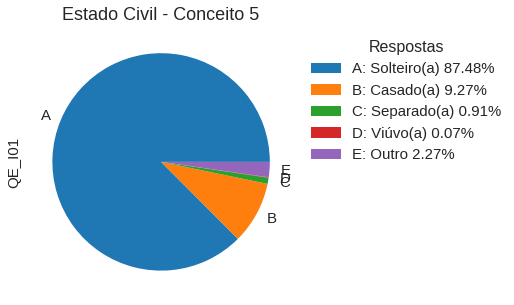

In [23]:
enade_maior['QE_I01'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15                                                        
    )

a = 'A: Solteiro(a) ' + '{:.2%}'.format(2509/nrespostas_validas_maior)
b = 'B: Casado(a) ' + '{:.2%}'.format(266/nrespostas_validas_maior)
c = 'C: Separado(a) ' + '{:.2%}'.format(26/nrespostas_validas_maior)
d = 'D: Viúvo(a) ' + '{:.2%}'.format(2/nrespostas_validas_maior)
e = 'E: Outro ' + '{:.2%}'.format(65/nrespostas_validas_maior)
     
plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e))

plt.title('Estado Civil - Conceito 5')

plt.xticks(rotation=0)

In [24]:
enade_menor['QE_I02'].value_counts().sort_index(ascending=True)

A     463
B     291
C      60
D    1310
E      22
F      54
Name: QE_I02, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

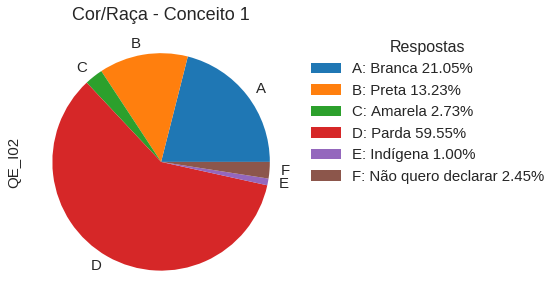

In [25]:
enade_menor['QE_I02'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15  
    )

a = 'A: Branca ' + '{:.2%}'.format(463/nrespostas_validas_menor)
b = 'B: Preta ' + '{:.2%}'.format(291/nrespostas_validas_menor)
c = 'C: Amarela ' + '{:.2%}'.format(60/nrespostas_validas_menor)
d = 'D: Parda ' + '{:.2%}'.format(1310/nrespostas_validas_menor)
e = 'E: Indígena ' + '{:.2%}'.format(22/nrespostas_validas_menor)
f = 'F: Não quero declarar ' + '{:.2%}'.format(54/nrespostas_validas_menor)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Cor/Raça - Conceito 1')

plt.xticks(rotation=0)


In [26]:
enade_maior['QE_I02'].value_counts().sort_index(ascending=True)

A    1174
B     298
C      54
D    1187
E      11
F     144
Name: QE_I02, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

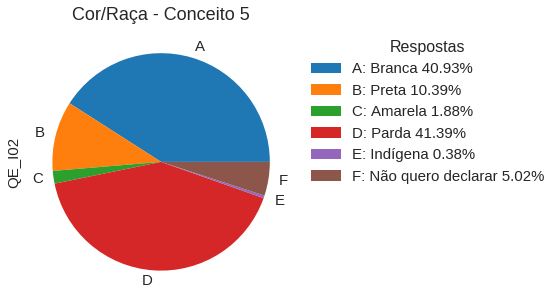

In [27]:
enade_maior['QE_I02'].value_counts().sort_index(ascending=True).plot(
    kind='pie',
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Branca ' + '{:.2%}'.format(1174/nrespostas_validas_maior)
b = 'B: Preta ' + '{:.2%}'.format(298/nrespostas_validas_maior)
c = 'C: Amarela ' + '{:.2%}'.format(54/nrespostas_validas_maior)
d = 'D: Parda ' + '{:.2%}'.format(1187/nrespostas_validas_maior)
e = 'E: Indígena ' + '{:.2%}'.format(11/nrespostas_validas_maior)
f = 'F: Não quero declarar ' + '{:.2%}'.format(144/nrespostas_validas_maior)

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Cor/Raça - Conceito 5')

plt.xticks(rotation=0)


In [28]:
enade_menor['QE_I04'].value_counts().sort_index(ascending=True)

A     552
B    1067
C     222
D     253
E      81
F      25
Name: QE_I04, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

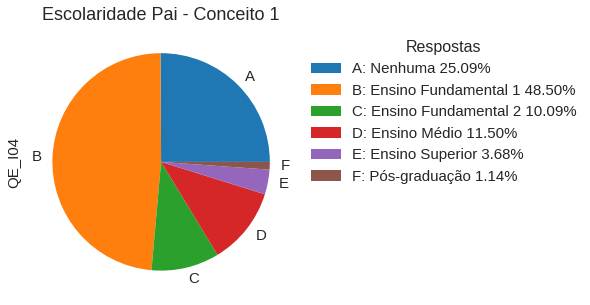

In [29]:
enade_menor['QE_I04'].value_counts().sort_index(ascending=True).plot(
    kind='pie',                                                     
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Nenhuma ' + '{:.2%}'.format(552/nrespostas_validas_menor)
b = 'B: Ensino Fundamental 1 ' + '{:.2%}'.format(1067/nrespostas_validas_menor)
c = 'C: Ensino Fundamental 2 ' + '{:.2%}'.format(222/nrespostas_validas_menor)
d = 'D: Ensino Médio ' + '{:.2%}'.format(253/nrespostas_validas_menor)
e = 'E: Ensino Superior ' + '{:.2%}'.format(81/nrespostas_validas_menor)
f = 'F: Pós-graduação ' + '{:.2%}'.format(25/nrespostas_validas_menor)
    
plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Escolaridade Pai - Conceito 1')

plt.xticks(rotation=0)

In [30]:
enade_maior['QE_I04'].value_counts().sort_index(ascending=True)

A    131
B    467
C    297
D    990
E    671
F    312
Name: QE_I04, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

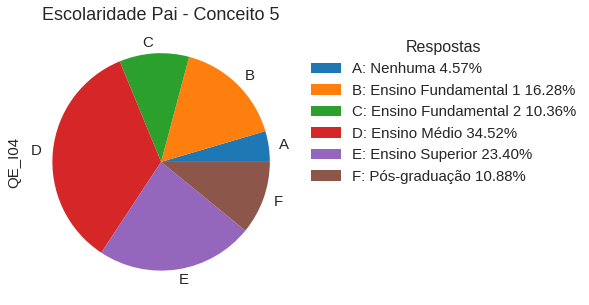

In [31]:
enade_maior['QE_I04'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Nenhuma ' + '{:.2%}'.format(131/nrespostas_validas_maior)
b = 'B: Ensino Fundamental 1 ' + '{:.2%}'.format(467/nrespostas_validas_maior)
c = 'C: Ensino Fundamental 2 ' + '{:.2%}'.format(297/nrespostas_validas_maior)
d = 'D: Ensino Médio ' + '{:.2%}'.format(990/nrespostas_validas_maior)
e = 'E: Ensino Superior ' + '{:.2%}'.format(671/nrespostas_validas_maior)
f = 'F: Pós-graduação ' + '{:.2%}'.format(312/nrespostas_validas_maior)  

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Escolaridade Pai - Conceito 5')


plt.xticks(rotation=0)

In [32]:
enade_menor['QE_I05'].value_counts().sort_index(ascending=True)

A    371
B    958
C    276
D    372
E    140
F     83
Name: QE_I05, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

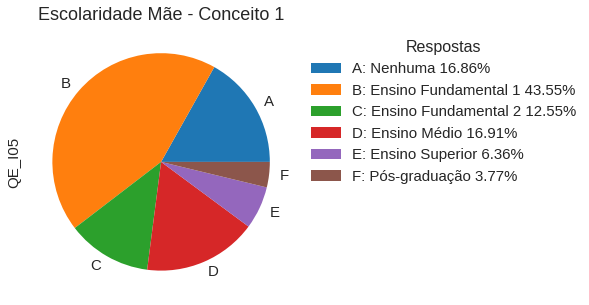

In [33]:
enade_menor['QE_I05'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Nenhuma ' + '{:.2%}'.format(371/nrespostas_validas_menor)
b = 'B: Ensino Fundamental 1 ' + '{:.2%}'.format(958/nrespostas_validas_menor)
c = 'C: Ensino Fundamental 2 ' + '{:.2%}'.format(276/nrespostas_validas_menor)
d = 'D: Ensino Médio ' + '{:.2%}'.format(372/nrespostas_validas_menor)
e = 'E: Ensino Superior ' + '{:.2%}'.format(140/nrespostas_validas_menor)
f = 'F: Pós-graduação ' + '{:.2%}'.format(83/nrespostas_validas_menor)   

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Escolaridade Mãe - Conceito 1')

plt.xticks(rotation=0)

In [34]:
enade_maior['QE_I05'].value_counts().sort_index(ascending=True)

A     60
B    319
C    318
D    957
E    737
F    477
Name: QE_I05, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

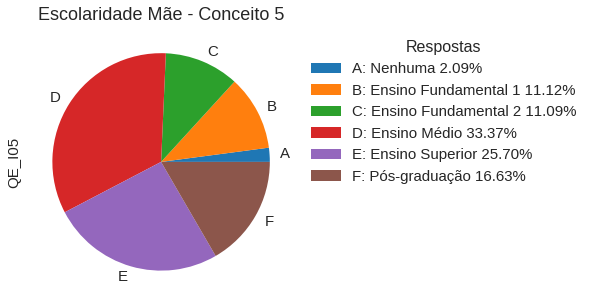

In [35]:
enade_maior['QE_I05'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Nenhuma ' + '{:.2%}'.format(60/nrespostas_validas_maior)
b = 'B: Ensino Fundamental 1 ' + '{:.2%}'.format(319/nrespostas_validas_maior)
c = 'C: Ensino Fundamental 2 ' + '{:.2%}'.format(318/nrespostas_validas_maior)
d = 'D: Ensino Médio ' + '{:.2%}'.format(957/nrespostas_validas_maior)
e = 'E: Ensino Superior ' + '{:.2%}'.format(737/nrespostas_validas_maior)
f = 'F: Pós-graduação ' + '{:.2%}'.format(477/nrespostas_validas_maior)   
    
plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Escolaridade Mãe - Conceito 5')

plt.xticks(rotation=0)


In [36]:
enade_menor['QE_I06'].value_counts().sort_index(ascending=True)

A     128
B     916
C    1055
D      67
E      13
F      21
Name: QE_I06, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

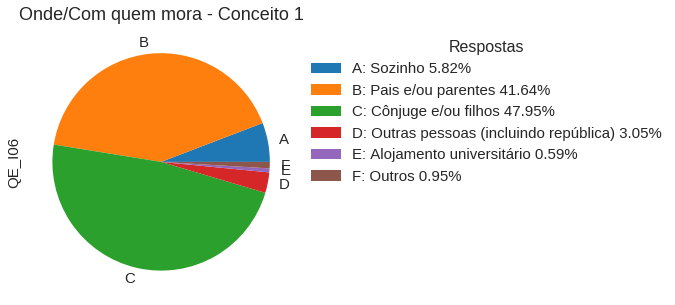

In [37]:
enade_menor['QE_I06'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Sozinho ' + '{:.2%}'.format(128/nrespostas_validas_menor)
b = 'B: Pais e/ou parentes ' + '{:.2%}'.format(916/nrespostas_validas_menor)
c = 'C: Cônjuge e/ou filhos ' + '{:.2%}'.format(1055/nrespostas_validas_menor)
d = 'D: Outras pessoas (incluindo república) ' + '{:.2%}'.format(67/nrespostas_validas_menor)
e = 'E: Alojamento universitário ' + '{:.2%}'.format(13/nrespostas_validas_menor)
f = 'F: Outros ' + '{:.2%}'.format(21/nrespostas_validas_menor)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Onde/Com quem mora - Conceito 1')

plt.xticks(rotation=0)

In [38]:
enade_maior['QE_I06'].value_counts().sort_index(ascending=True)

A     149
B    2113
C     353
D     209
E      27
F      17
Name: QE_I06, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

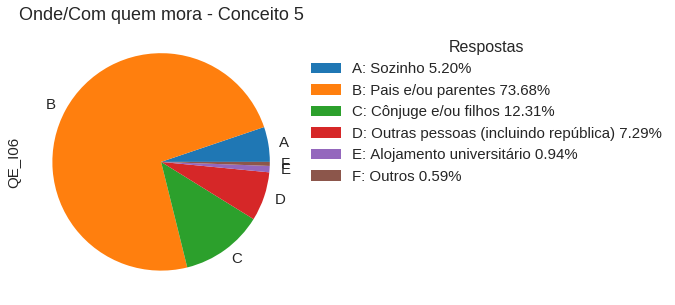

In [39]:
enade_maior['QE_I06'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Sozinho ' + '{:.2%}'.format(149/nrespostas_validas_maior)
b = 'B: Pais e/ou parentes ' + '{:.2%}'.format(2113/nrespostas_validas_maior)
c = 'C: Cônjuge e/ou filhos ' + '{:.2%}'.format(353/nrespostas_validas_maior)
d = 'D: Outras pessoas (incluindo república) ' + '{:.2%}'.format(209/nrespostas_validas_maior)
e = 'E: Alojamento universitário ' + '{:.2%}'.format(27/nrespostas_validas_maior)
f = 'F: Outros ' + '{:.2%}'.format(17/nrespostas_validas_maior)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Onde/Com quem mora - Conceito 5')

plt.xticks(rotation=0)

In [40]:
enade_menor['QE_I07'].value_counts().sort_index(ascending=True)

A    129
B    267
C    433
D    544
E    422
F    221
G     94
H     90
Name: QE_I07, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

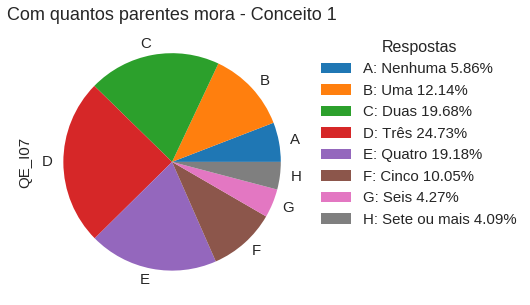

In [41]:
enade_menor['QE_I07'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Nenhuma ' + '{:.2%}'.format(129/nrespostas_validas_menor)
b = 'B: Uma ' + '{:.2%}'.format(267/nrespostas_validas_menor)
c = 'C: Duas ' + '{:.2%}'.format(433/nrespostas_validas_menor)
d = 'D: Três ' + '{:.2%}'.format(544/nrespostas_validas_menor)
e = 'E: Quatro ' + '{:.2%}'.format(422/nrespostas_validas_menor)
f = 'F: Cinco ' + '{:.2%}'.format(221/nrespostas_validas_menor)
g = 'G: Seis ' + '{:.2%}'.format(94/nrespostas_validas_menor)
h = 'H: Sete ou mais ' + '{:.2%}'.format(90/nrespostas_validas_menor)
  
plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f,g,h))

plt.title('Com quantos parentes mora - Conceito 1')

plt.xticks(rotation=0)

In [42]:
enade_maior['QE_I07'].value_counts().sort_index(ascending=True)

A    306
B    409
C    625
D    832
E    411
F    170
G     63
H     52
Name: QE_I07, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

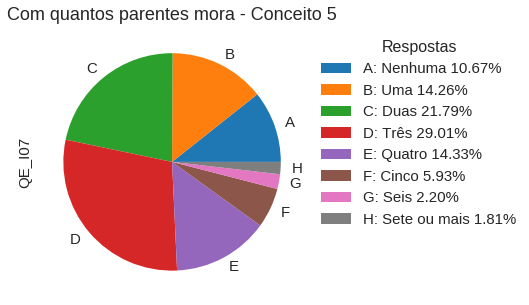

In [43]:
enade_maior['QE_I07'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Nenhuma ' + '{:.2%}'.format(306/nrespostas_validas_maior)
b = 'B: Uma ' + '{:.2%}'.format(409/nrespostas_validas_maior)
c = 'C: Duas ' + '{:.2%}'.format(625/nrespostas_validas_maior)
d = 'D: Três ' + '{:.2%}'.format(832/nrespostas_validas_maior)
e = 'E: Quatro ' + '{:.2%}'.format(411/nrespostas_validas_maior)
f = 'F: Cinco ' + '{:.2%}'.format(170/nrespostas_validas_maior)
g = 'G: Seis ' + '{:.2%}'.format(63/nrespostas_validas_maior)
h = 'H: Sete ou mais ' + '{:.2%}'.format(52/nrespostas_validas_maior)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f,g,h))

plt.title('Com quantos parentes mora - Conceito 5')

plt.xticks(rotation=0)

In [44]:
enade_menor['QE_I08'].value_counts().sort_index(ascending=True)

A    1236
B     641
C     204
D      68
E      36
F      14
G       1
Name: QE_I08, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

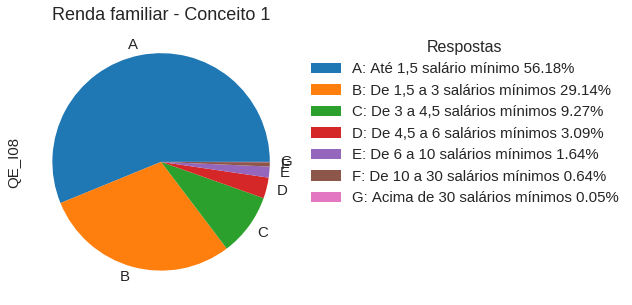

In [45]:
enade_menor['QE_I08'].value_counts().sort_index(ascending=True).plot(
    kind='pie',
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Até 1,5 salário mínimo ' + '{:.2%}'.format(1236/nrespostas_validas_menor)
b = 'B: De 1,5 a 3 salários mínimos ' + '{:.2%}'.format(641/nrespostas_validas_menor)
c = 'C: De 3 a 4,5 salários mínimos ' + '{:.2%}'.format(204/nrespostas_validas_menor)
d = 'D: De 4,5 a 6 salários mínimos ' + '{:.2%}'.format(68/nrespostas_validas_menor)
e = 'E: De 6 a 10 salários mínimos ' + '{:.2%}'.format(36/nrespostas_validas_menor)
f = 'F: De 10 a 30 salários mínimos ' + '{:.2%}'.format(14/nrespostas_validas_menor)
g = 'G: Acima de 30 salários mínimos ' + '{:.2%}'.format(1/nrespostas_validas_menor)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f,g,h))

plt.title('Renda familiar - Conceito 1')

plt.xticks(rotation=0)

In [46]:
enade_maior['QE_I08'].value_counts().sort_index(ascending=True)

A    533
B    617
C    496
D    325
E    425
F    424
G     48
Name: QE_I08, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

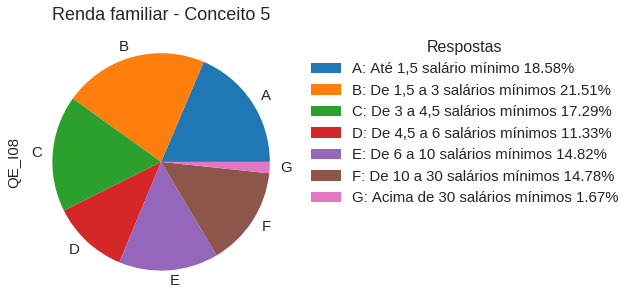

In [47]:
enade_maior['QE_I08'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Até 1,5 salário mínimo ' + '{:.2%}'.format(533/nrespostas_validas_maior)
b = 'B: De 1,5 a 3 salários mínimos ' + '{:.2%}'.format(617/nrespostas_validas_maior)
c = 'C: De 3 a 4,5 salários mínimos ' + '{:.2%}'.format(496/nrespostas_validas_maior)
d = 'D: De 4,5 a 6 salários mínimos ' + '{:.2%}'.format(325/nrespostas_validas_maior)
e = 'E: De 6 a 10 salários mínimos ' + '{:.2%}'.format(425/nrespostas_validas_maior)
f = 'F: De 10 a 30 salários mínimos ' + '{:.2%}'.format(424/nrespostas_validas_maior)
g = 'G: Acima de 30 salários mínimos ' + '{:.2%}'.format(48/nrespostas_validas_maior)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f,g))

plt.title('Renda familiar - Conceito 5')

plt.xticks(rotation=0)

In [48]:
enade_menor['QE_I10'].value_counts().sort_index(ascending=True)

A    732
B    258
C    425
D    176
E    609
Name: QE_I10, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

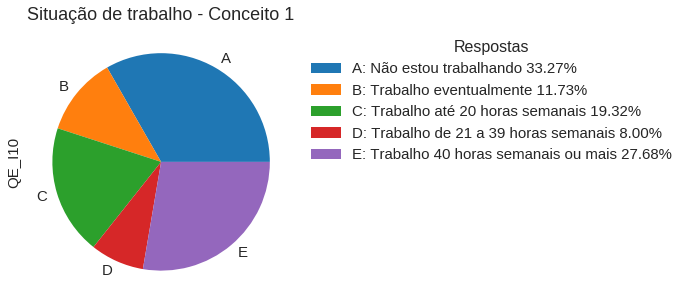

In [49]:
enade_menor['QE_I10'].value_counts().sort_index(ascending=True).plot(
    kind='pie',
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Não estou trabalhando ' + '{:.2%}'.format(732/nrespostas_validas_menor)
b = 'B: Trabalho eventualmente ' + '{:.2%}'.format(258/nrespostas_validas_menor)
c = 'C: Trabalho até 20 horas semanais ' + '{:.2%}'.format(425/nrespostas_validas_menor)
d = 'D: Trabalho de 21 a 39 horas semanais ' + '{:.2%}'.format(176/nrespostas_validas_menor)
e = 'E: Trabalho 40 horas semanais ou mais ' + '{:.2%}'.format(609/nrespostas_validas_menor)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e))

plt.title('Situação de trabalho - Conceito 1')

plt.xticks(rotation=0)

In [50]:
enade_maior['QE_I10'].value_counts().sort_index(ascending=True)

A    1653
B     229
C     289
D     292
E     405
Name: QE_I10, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

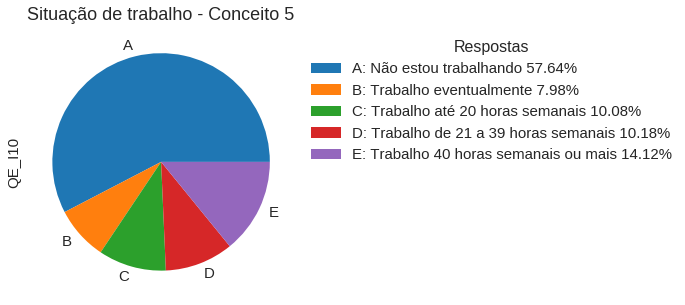

In [63]:
enade_maior['QE_I10'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Não estou trabalhando ' + '{:.2%}'.format(1653/nrespostas_validas_maior)
b = 'B: Trabalho eventualmente ' + '{:.2%}'.format(229/nrespostas_validas_maior)
c = 'C: Trabalho até 20 horas semanais ' + '{:.2%}'.format(289/nrespostas_validas_maior)
d = 'D: Trabalho de 21 a 39 horas semanais ' + '{:.2%}'.format(292/nrespostas_validas_maior)
e = 'E: Trabalho 40 horas semanais ou mais ' + '{:.2%}'.format(405/nrespostas_validas_maior)
   
plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e))

plt.title('Situação de trabalho - Conceito 5')

plt.xticks(rotation=0)

In [52]:
enade_menor['QE_I15'].value_counts().sort_index(ascending=True)

A    1562
B      66
C      87
D     232
E      50
F     203
Name: QE_I15, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

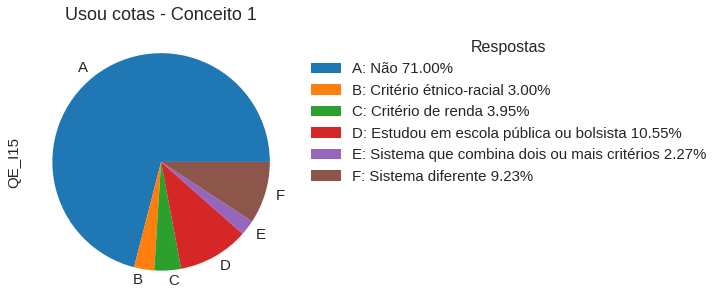

In [53]:
enade_menor['QE_I15'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Não ' + '{:.2%}'.format(1562/nrespostas_validas_menor)
b = 'B: Critério étnico-racial ' + '{:.2%}'.format(66/nrespostas_validas_menor)
c = 'C: Critério de renda ' + '{:.2%}'.format(87/nrespostas_validas_menor)
d = 'D: Estudou em escola pública ou bolsista ' + '{:.2%}'.format(232/nrespostas_validas_menor)
e = 'E: Sistema que combina dois ou mais critérios ' + '{:.2%}'.format(50/nrespostas_validas_menor)
f = 'F: Sistema diferente ' + '{:.2%}'.format(203/nrespostas_validas_menor)
   
plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Usou cotas - Conceito 1')

plt.xticks(rotation=0)

In [54]:
enade_maior['QE_I15'].value_counts().sort_index(ascending=True)

A    2216
B      86
C      77
D     304
E     161
F      24
Name: QE_I15, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

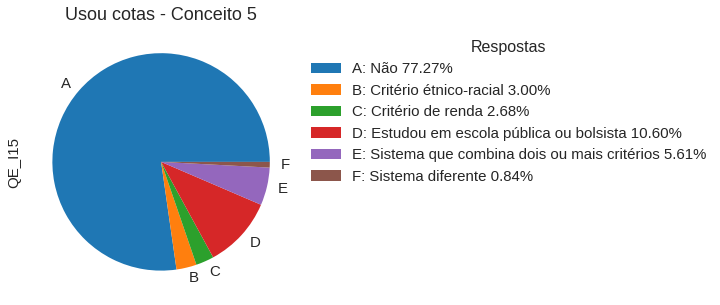

In [55]:
enade_maior['QE_I15'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Não ' + '{:.2%}'.format(2216/nrespostas_validas_maior)
b = 'B: Critério étnico-racial ' + '{:.2%}'.format(86/nrespostas_validas_maior)
c = 'C: Critério de renda ' + '{:.2%}'.format(77/nrespostas_validas_maior)
d = 'D: Estudou em escola pública ou bolsista ' + '{:.2%}'.format(304/nrespostas_validas_maior)
e = 'E: Sistema que combina dois ou mais critérios ' + '{:.2%}'.format(161/nrespostas_validas_maior)
f = 'F: Sistema diferente ' + '{:.2%}'.format(24/nrespostas_validas_maior)
       
plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Usou cotas - Conceito 5')

plt.xticks(rotation=0)

In [56]:
enade_menor['QE_I17'].value_counts().sort_index(ascending=True)

A    1890
B     189
D      83
E      37
F       1
Name: QE_I17, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

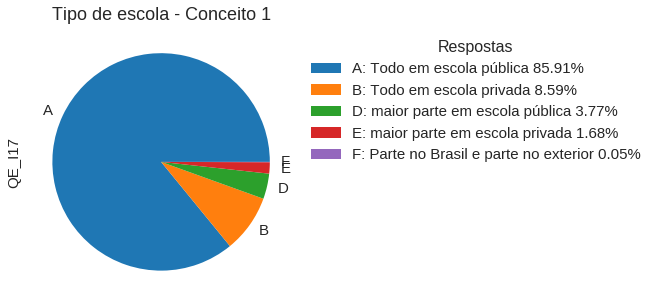

In [57]:
enade_menor['QE_I17'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15
    )

a = 'A: Todo em escola pública ' + '{:.2%}'.format(1890/nrespostas_validas_menor)
b = 'B: Todo em escola privada ' + '{:.2%}'.format(189/nrespostas_validas_menor)
# c = 'C: Todo no exterior ' + '{:.2%}'.format(0/2767)
d = 'D: maior parte em escola pública ' + '{:.2%}'.format(83/nrespostas_validas_menor)
e = 'E: maior parte em escola privada ' + '{:.2%}'.format(37/nrespostas_validas_menor)
f = 'F: Parte no Brasil e parte no exterior ' + '{:.2%}'.format(1/nrespostas_validas_menor)
     
plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,d,e,f))

plt.title('Tipo de escola - Conceito 1')

plt.xticks(rotation=0)


In [58]:
enade_maior['QE_I17'].value_counts().sort_index(ascending=True)

A    1105
B    1620
C       6
D      46
E      86
F       5
Name: QE_I17, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

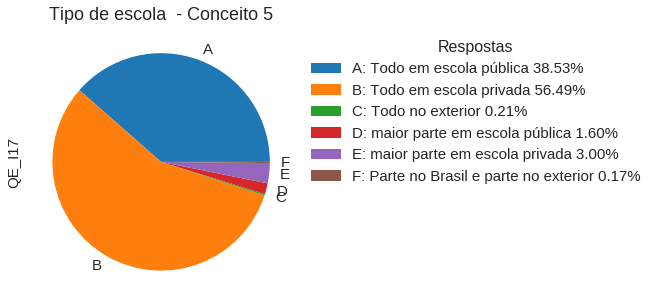

In [59]:
enade_maior['QE_I17'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Todo em escola pública ' + '{:.2%}'.format(1105/nrespostas_validas_maior)
b = 'B: Todo em escola privada ' + '{:.2%}'.format(1620/nrespostas_validas_maior)
c = 'C: Todo no exterior ' + '{:.2%}'.format(6/nrespostas_validas_maior)
d = 'D: maior parte em escola pública ' + '{:.2%}'.format(46/nrespostas_validas_maior)
e = 'E: maior parte em escola privada ' + '{:.2%}'.format(86/nrespostas_validas_maior)
f = 'F: Parte no Brasil e parte no exterior ' + '{:.2%}'.format(5/nrespostas_validas_maior)
     
plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e,f))

plt.title('Tipo de escola  - Conceito 5')

plt.xticks(rotation=0)

In [60]:
enade_menor['QE_I23'].value_counts().sort_index(ascending=True)

A      85
B    1165
C     573
D     228
E     149
Name: QE_I23, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

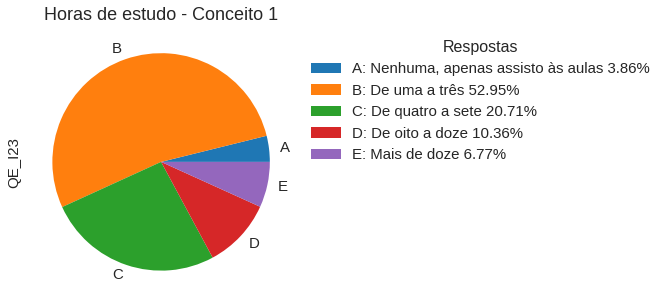

In [68]:
enade_menor['QE_I23'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15
    )

a = 'A: Nenhuma, apenas assisto às aulas ' + '{:.2%}'.format(85/nrespostas_validas_menor)
b = 'B: De uma a três ' + '{:.2%}'.format(1165/nrespostas_validas_menor)
c = 'C: De quatro a sete ' + '{:.2%}'.format(573/2767)
d = 'D: De oito a doze ' + '{:.2%}'.format(228/nrespostas_validas_menor)
e = 'E: Mais de doze ' + '{:.2%}'.format(149/nrespostas_validas_menor)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e))

plt.title('Horas de estudo - Conceito 1')

plt.xticks(rotation=0)


In [65]:
enade_maior['QE_I23'].value_counts().sort_index(ascending=True)

A     69
B    794
C    919
D    537
E    549
Name: QE_I23, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

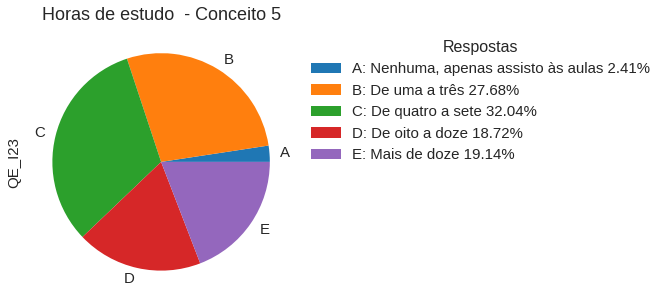

In [69]:
enade_maior['QE_I23'].value_counts().sort_index(ascending=True).plot(
    kind='pie', 
    figsize=(5, 5),
    fontsize=15 
    )

a = 'A: Nenhuma, apenas assisto às aulas ' + '{:.2%}'.format(69/nrespostas_validas_maior)
b = 'B: De uma a três ' + '{:.2%}'.format(794/nrespostas_validas_maior)
c = 'C: De quatro a sete ' + '{:.2%}'.format(919/nrespostas_validas_maior)
d = 'D: De oito a doze ' + '{:.2%}'.format(537/nrespostas_validas_maior)
e = 'E: Mais de doze ' + '{:.2%}'.format(549/nrespostas_validas_maior)

plt.rc('font', size=15) 

plt.legend(title='Respostas', 
           title_fontsize=16, 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize=15,
           labels=(a,b,c,d,e))

plt.title('Horas de estudo  - Conceito 5')

plt.xticks(rotation=0)